In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook
from sklearn.model_selection import train_test_split

In [30]:
def franke(x,y):
    a = 0.75*np.exp(-((9*x-2)**2)/4-((9*y-2)**2)/4)
    b = 0.75*np.exp(-((9*x+1)**2)/49-((9*y+1)**2)/10)
    c = 0.5*np.exp(-((9*x-7)**2)/4-((9*y-3)**2)/4)
    d = 0.2*np.exp(-((9*x-4)**2)-((9*y-7)**2))
    return a+b+c-d

<IPython.core.display.Javascript object>


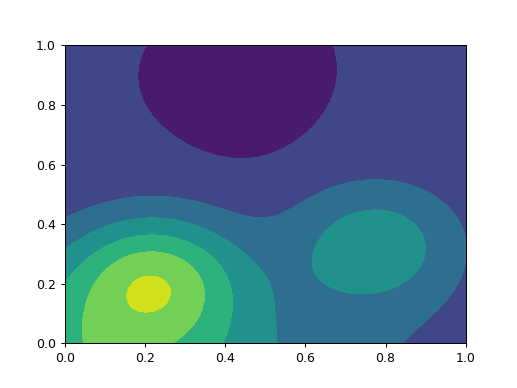

In [31]:
points = 100
x = np.linspace(0,1,points)
y = np.linspace(0,1,points)
xx, yy = np.meshgrid(x,y)

ff = franke(xx,yy)

plt.interactive(True)
plt.contourf(xx, yy, ff)
plt.show()



<IPython.core.display.Javascript object>


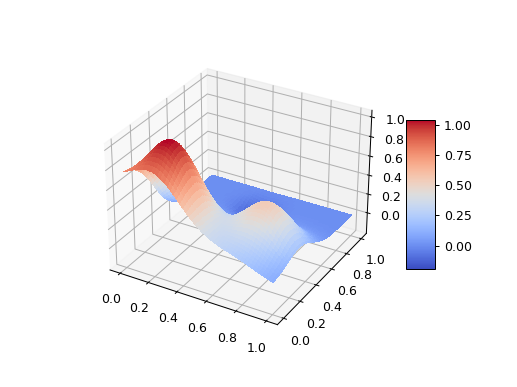

/tmp/ipykernel_6119/3564484810.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [32]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx,yy,ff, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

<IPython.core.display.Javascript object>


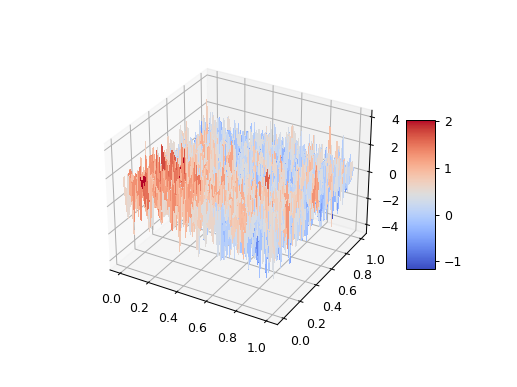

/tmp/ipykernel_6119/1226439545.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


array([[ 1.81866015,  0.22261545, -0.83570879, ...,  0.43232348,
         2.58671212, -0.2637527 ],
       [ 1.94445246, -0.08621119,  0.62015896, ...,  1.03962559,
         1.79867622,  0.17369599],
       [ 0.29164342, -1.10978977,  2.12551779, ..., -0.4511616 ,
         0.05348171, -0.85718773],
       ...,
       [-0.45893961, -0.40861118,  1.83709715, ..., -0.86812613,
         0.92021622,  1.02345229],
       [ 0.58038368, -1.61131448, -0.01814131, ..., -0.74717281,
        -0.39195128,  0.59318708],
       [-1.22747217, -1.26520498, -0.77584277, ...,  1.39740201,
        -0.45221969,  0.36419143]])

In [33]:
ffnoise = ff + np.random.normal(size = [points, points])
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx,yy,ffnoise, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ffnoise

# Normalising data

Since the noiseless data is already normalised to [0,1] range, we do not normalise it

# Creating Design Matrix

## Find out the powers of the terms of a 2D polynomial

First array returns powers of $x$ and the second array returns powers of $y$ for a particular order of polynomial as $$x^0y^1 + x^1y^0 + x^0y^2 + x^1y^1 + x^2y^0 + x^0y^3 +x^1y^2 + x^2y^1 + x^3y^0 + ... = x + y + x^2 + xy + y^2 + x^3 + x^2y+ xy^2 + y^3 + .. $$

In [34]:
def poly_powers(order):
    xpow = []
    ypow = []
    for i in np.arange(1,order+1):
        print(i)
        for j in np.arange(0,i+1):
            xpow.append(j)
            ypow.append(i-j)
    return xpow, ypow
poly_powers(3)

1
2
3


([0, 1, 0, 1, 2, 0, 1, 2, 3], [1, 0, 2, 1, 0, 3, 2, 1, 0])

## creating actual design matrix based on values of x and y 

Insert formula for the design matrix here

In [35]:
def design_matrix(xx, yy, order):
    xpow, ypow = poly_powers(order)
    xpow = [0]+xpow
    ypow = [0]+ypow
    x_linear = xx.flatten()
    y_linear = yy.flatten()
    n = len(x_linear)
    design_mat = np.zeros((n, len(xpow)))
    
    for term in range(len(xpow)):
        design_mat[:, term] = (x_linear**xpow[term])*(y_linear**ypow[term])
    
    return design_mat
X = design_matrix(xx, yy, 3)

1
2
3


# Finding Coefficients of the fit polynomial

## finding $(\boldsymbol{X}^T\boldsymbol{X})^{-1}$
$\boldsymbol{X}$ is the design matrix

In [36]:
X = np.asmatrix(X)
XT = np.asmatrix(np.transpose(X))   
XTX = XT*X
C = np.linalg.inv(XTX)
C.shape

(10, 10)

## finding parameters

In [37]:
f_linear = ff.flatten()
beta = (C*XT)*(f_linear.reshape(len(f_linear),1))


def find_params(X, out):
    #out is a 1d output array
    X = np.asmatrix(X)
    XT = np.asmatrix(np.transpose(X))   
    XTX = XT*X
    C = np.linalg.inv(XTX)
    #beta = (C*XT)*(f_linear.reshape(len(f_linear),1))
    beta = (C*XT)*out
    

In [38]:
# Finding fit values of function
ff_fit = beta
x_linear = xx.flatten()
y_linear = yy.flatten()
def out_predicted(beta, data, order):
    #data is the array of 1D array of x and y
    x = data[0]
    y = data[1]
    xpow, ypow = poly_powers(order)
    xpow = [0]+xpow
    ypow = [0]+ypow
    
    output = np.zeros(len(x))
    for term in range(len(xpow)):
        output[:] += beta[term]*(x**xpow[term])*(y**ypow[term])
    return output

1
2
3
1
2
3


<IPython.core.display.Javascript object>


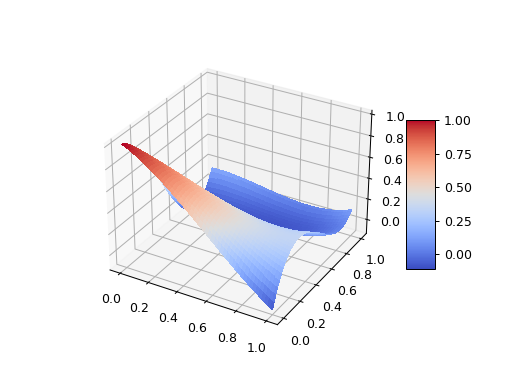

/tmp/ipykernel_6119/1120237618.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [39]:
#ff_fit = out_predicted(beta, [x_linear, y_linear], 5)
#output.reshape((points, points))
#output

X = design_matrix(xx, yy, 3)
ff_fit = design_matrix(xx, yy, 3) @ beta
ff_fit = ff_fit.reshape([points, points])

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx,yy,ff_fit, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

In [41]:
def findMSE(data, fit):
    n = len(data)
    return np.sum((data-fit)**2)/n

In [47]:
findMSE(ff.flatten(), np.transpose(ff_fit.flatten()))

-7525749.011270041